# Objective
The goal of this analysis is to utilize recurrent neural networking on a combined dataset of reviews from Amazon, IMDB, and Yelp to detect patterns and make predictions that provide actionable insight for stakeholders. 

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import Packages and Libraries

import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import os
import datetime
import tensorflow.keras
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
import tensorflow as tf

In [4]:
# Import Amazon Dataset

df1 = pd.read_csv(r"E:\Users\laisu\Downloads\amazon.csv - amazon_cells_labelled.csv", names=['Review', 'Sentiment_Value'], header=None, dtype={'locationid' :np.int64},parse_dates=True)

In [5]:
df1.head(5)

,Review,Sentiment_Value
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [6]:
# Import IMDB Dataset

df2 = pd.read_csv(r"E:\Users\laisu\Downloads\imdb.csv - imdb_labelled (1).csv", names=['Review', 'Sentiment_Value'], header=None, dtype={'locationid' :np.int64},parse_dates=True)

In [7]:
df2

,Review,Sentiment_Value
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [8]:
# Import Yelp Dataset

df3 = pd.read_csv(r"E:\Users\laisu\Downloads\yelp.csv - yelp_labelled.csv", names=['Review', 'Sentiment_Value'], header=None, dtype={'locationid' :np.int64},parse_dates=True)

In [9]:
df3

,Review,Sentiment_Value
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


# Data Cleaning and Preparation
- Read and import the datasets into the Jupyter notebook and combine the datasets into one data frame 

- Conduct data cleaning and exploratory analysis by checking for shape, missing values, vocabulary size, unusual characters, embedding length 

- Clean text by lowercasing, removing punctuation, and removing unwanted characters 

- Implement stopwords to remove conjunctions and word particles 

- Lemmatize and tokenize the data  

- Vectorize the data with integer encoding 

- Add padding to either before or after the sequences 

- Split the dataset into validation, training, and test sets into an 80/20 split, as this is the common partitioning utilized for machine learning

In [10]:
# Combine the 3 datasets into a single DataFrame

df=pd.concat((df1, df2, df3), ignore_index=True)

In [11]:
df.shape

(2748, 2)

In [12]:
# Detect for Missing Values

df.isnull().sum()

Review             0
Sentiment_Value    0
dtype: int64

In [13]:
# Dropping Nulls

df.dropna()

,Review,Sentiment_Value
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2743,I think food should have flavor and texture an...,0
2744,Appetite instantly gone.,0
2745,Overall I was not impressed and would not go b...,0
2746,"The whole experience was underwhelming, and I ...",0


In [14]:
# lowercasing

df['Review']=df['Review'].str.lower()

In [15]:
# Removing Punctuation

import re
p = re.compile(r'[^\w\s]+')
df['Review']= [p.sub('', x) for x in df['Review'].tolist()]
df

,Review,Sentiment_Value
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1
3,tied to charger for conversations lasting more...,0
4,the mic is great,1
...,...,...
2743,i think food should have flavor and texture an...,0
2744,appetite instantly gone,0
2745,overall i was not impressed and would not go back,0
2746,the whole experience was underwhelming and i t...,0


In [16]:
# Detecting Unusual Characters

unusual_char = df['Review']
list_of_char = []
for comment in unusual_char:
    for char in comment:
        if char not in list_of_char:
            list_of_char.append(char)
print(list_of_char)

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', 'd', 'x', 'j', '4', '5', 'z', 'q', 'k', '7', '3', '6', '8', '0', '2', '1', '9', '\t', '\n', 'é', '\x85', 'å', 'ê']


In [17]:
# Vocabulary Size

text_data = df['Review'].astype(str)

tokens = [word_tokenize(text) for text in text_data]
all_words = [word for sublist in tokens for word in sublist]
vocabulary = set(all_words)
vocabulary_size = len(vocabulary)
print("Vocabulary Size:", vocabulary_size)

Vocabulary Size: 5400


In [19]:
# Applying stopwords, tokenizing, and vectorizing1

stop_words= set(stopwords.words('english'))

data_set = []
for sentence in df.Review:
    data_set.append([word for word in word_tokenize(sentence) if word not in stop_words])
    
vocab_size=5400
x=df['Review']
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(x)
x = tokenizer.texts_to_sequences(x)


In [18]:
# Proposed Embedding Length

sequences = tokenizer.texts_to_sequences(df['Review'])
tokenizer = Tokenizer()
max_sequence_length = max(len(seq) for seq in sequences)
proposed_embedding_length = int(np.ceil(max_sequence_length * 0.1))
print(proposed_embedding_length)

139


In [19]:
proposed_embedding_length = int(round(np.sqrt(np.sqrt(len(vocabulary))), 0))
print("Proposed Word Embedding Length:", proposed_embedding_length)

Proposed Word Embedding Length: 9


In [20]:
# Maximum Sequence Lengths

sequence_lengths = [len(seq) for seq in sequences]
max_sequence_length = np.max(sequence_lengths)
median_sequence_length = np.median(sequence_lengths)
min_sequence_length = np.min(sequence_lengths)
print("Maximum Sequence Length:", max_sequence_length)
print("Median Sequence Length:", median_sequence_length)
print("Minimum Sequence Length:", min_sequence_length)

Maximum Sequence Length: 1384
Median Sequence Length: 10.0
Minimum Sequence Length: 1


In [21]:
# Padding

from tensorflow.keras.preprocessing.sequence import pad_sequences
rev_list=[]
rev_list.append(df['Review'])
rev_list=np.asarray(rev_list, dtype=object)
max_len=len(max(rev_list, key=len))

padded= pad_sequences(sequences,padding='post',truncating='post',maxlen=max_len)
padded

array([[ 27,  49,   5, ...,   0,   0,   0],
       [ 18, 152,  99, ...,   0,   0,   0],
       [ 20,  12,   1, ...,   0,   0,   0],
       ...,
       [289,   3,  10, ...,   0,   0,   0],
       [  1, 358, 165, ...,   0,   0,   0],
       [142,  26,  46, ...,   0,   0,   0]])

In [22]:
# Classifying Text to Number

from sklearn.datasets import make_classification
import random
n = random.randint(0, len(rev_list))
print('"', df.Review[n], '"')
print(padded[n])

" so there is no way for me to plug it in here in the us unless i go by a converter "
[27 49  5 ...  0  0  0]


In [23]:
num_classes = 2
model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_classes, activation='sigmoid')
])

print("Number of sentiment categories:", num_classes)

Number of sentiment categories: 2


In [24]:
X= padded
X

array([[ 27,  49,   5, ...,   0,   0,   0],
       [ 18, 152,  99, ...,   0,   0,   0],
       [ 20,  12,   1, ...,   0,   0,   0],
       ...,
       [289,   3,  10, ...,   0,   0,   0],
       [  1, 358, 165, ...,   0,   0,   0],
       [142,  26,  46, ...,   0,   0,   0]])

In [25]:
y= np.array(df['Review'].values)
y

array(['so there is no way for me to plug it in here in the us unless i go by a converter',
       'good case excellent value', 'great for the jawbone', ...,
       'overall i was not impressed and would not go back',
       'the whole experience was underwhelming and i think well just go to ninja sushi next time',
       'then as if i hadnt wasted enough of my life there they poured salt in the wound by drawing out the time it took to bring the check'],
      dtype=object)

In [26]:
# Splitting Dataset

X_train, X_test, y_train, y_test = train_test_split(padded, np.array(df['Sentiment_Value']), test_size=0.2, random_state=42)

In [50]:
# Saving Split dataset

pd.DataFrame(X_train).to_csv(r"E:\Users\laisu\Documents\X_train213.csv")
pd.DataFrame(X_test).to_csv(r"E:\Users\laisu\Documents\X_test213.csv")
pd.DataFrame(y_train).to_csv(r"E:\Users\laisu\Documents\y_train213.csv")
pd.DataFrame(y_test).to_csv(r"E:\Users\laisu\Documents\y_test213.csv")

# Analysis
To create our neural network model, I imported the library TensorFlow and utilized the package keras. Keras is a package in Python that is utilized to build, configure, and deploy neural networks.
- Model Parameters: Our neural network model consists of 3 layers, which are the embedding, LSTM, and dense layers. The embedding layer is used within natural language processing to create embeddings, or numerical vector representations, for categorical variables, this layer consists of 48,600 trainable parameters. The Long Short-Term Memory (LSTM) layer assists our neural network model to process long-term dependencies in sequential data, and this layer consists of 16,800 trainable parameters. The dense layer allows our neural network model to process complex patterns and embeddings through linear and non-linear transformations, and this layer consists of 61 trainable parameters. 

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
# Sequential Model

embed_size=int(round(vocabulary_size ** (1/4))) #, 0))

model = Sequential()
model.add(Embedding(vocab_size, embed_size, input_shape = (X_train.shape[1],)))
model.add(LSTM(units=60, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2748, 9)           48600     
                                                                 
 lstm (LSTM)                 (None, 60)                16800     
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 65461 (255.71 KB)
Trainable params: 65461 (255.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
# Running our Model through 20 Epochs with Stopping Criteria

from tensorflow.keras.callbacks import EarlyStopping

early_stopping_monitor = EarlyStopping(patience=8)
history = model.fit(X_train, y_train, epochs = 20, batch_size = 32, validation_split=0.3, verbose=True, callbacks=[early_stopping_monitor], validation_data=(X_test, y_test))

Epoch 1/20
69/69 [==============================] - 83s 1s/step - loss: 0.6957 - accuracy: 0.5082 - val_loss: 0.6962 - val_accuracy: 0.4709
Epoch 2/20
69/69 [==============================] - 97s 1s/step - loss: 0.6933 - accuracy: 0.4791 - val_loss: 0.7135 - val_accuracy: 0.4709
Epoch 3/20
69/69 [==============================] - 97s 1s/step - loss: 0.6953 - accuracy: 0.4891 - val_loss: 0.6969 - val_accuracy: 0.4709
Epoch 4/20
69/69 [==============================] - 90s 1s/step - loss: 0.6935 - accuracy: 0.5073 - val_loss: 0.7027 - val_accuracy: 0.4709
Epoch 5/20
69/69 [==============================] - 96s 1s/step - loss: 0.6954 - accuracy: 0.5146 - val_loss: 0.6915 - val_accuracy: 0.5291
Epoch 6/20
69/69 [==============================] - 85s 1s/step - loss: 0.6958 - accuracy: 0.4982 - val_loss: 0.6952 - val_accuracy: 0.4709
Epoch 7/20
69/69 [==============================] - 94s 1s/step - loss: 0.6940 - accuracy: 0.5018 - val_loss: 0.6958 - val_accuracy: 0.4709
Epoch 8/20
69/69 [==

In [36]:
model.evaluate(X_test, y_test)

18/18 [==============================] - 6s 319ms/step - loss: 0.6926 - accuracy: 0.5291


[0.692604660987854, 0.5290908813476562]

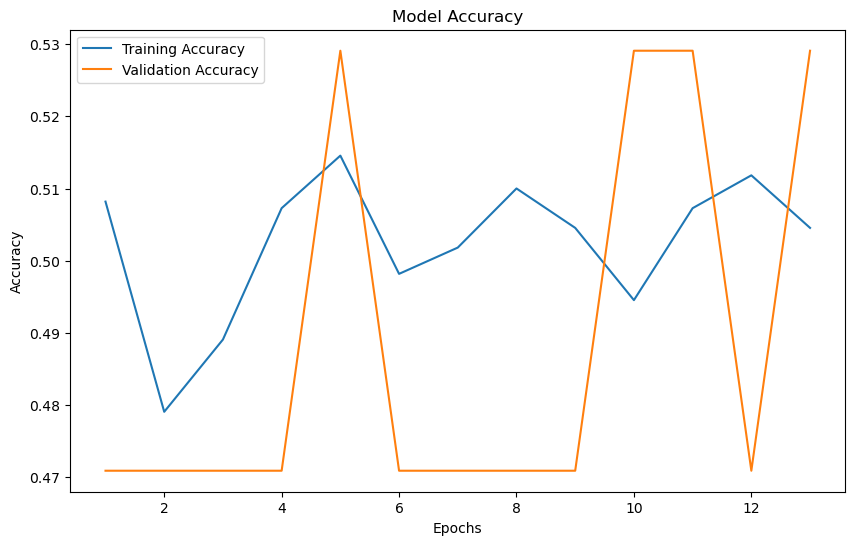

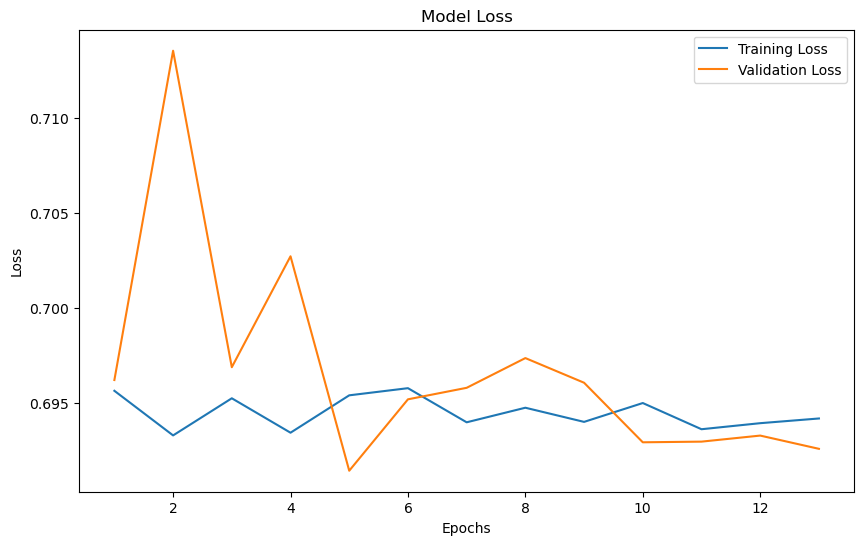

In [37]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
sentiment_label = df.Sentiment_Value.factorize()

In [55]:
# Prediction Model

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=2748)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [57]:
test_sentence1 = "good case and excellent value"
predict_sentiment(test_sentence1)

1/1 [==============================] - 0s 87ms/step
Predicted label:  0


In [42]:
df.to_csv (r"E:\Users\laisu\Documents\data2132.csv")

# Results
- Utilizing our stopping criteria, our model was run with a various number of epochs until our stopping criteria halts. This resulted when we ran 20 epochs, the stopping criteria halted our model at 12 epochs when our validation loss did not improve.
- Our model was processed through a various number of stopping criteria and epochs. The best predictive accuracy we achieved was 47.09 %. This indicates we were able to correctly predict 47.09% of training outcomes. Our average loss was 0.6937.
- The architecture of our RNN model is well suited for text classification and structured for the consideration of our binary sentiment values. Though the prediction accuracy was approximately 50%, we were still able to predict whether a user's review was positive or negative based on test classification. This will provide actionable insights for stakeholders to improve customer satisfaction. 

# Recommendations
Based on our low prediction accuracy value, I would not be confident for a company to utilize our neural network model. I would recommend providing a larger sample size to hopefully improve the accuracy of our model. I would also recommend separating the data into product-based reviews for predictions. I believe it may be difficult to accurately predict customer sentiment when combining reviews for multiple products across multiple platforms. I believe it would be more effective to analyze reviews and sentiments based on types of products, rather than across a whole platform with a numerous number of different products. I would also recommend adding variables to our dataset with specific dates for a review and products that the review is linked to.